# Programming for Artificial Intelligence（Python）- Homework 5

**Student:** 林澈 

**Student ID:** 15220202205098



## Question 1 super! (code and in words)

In [9]:
class Shape:
    def __init__(self, color, filled):
        self.color = color
        self.filled = filled
    def area(self):
        pass  # To be implemented by subclasses
    def perimeter(self):
        pass  # To be implemented by subclasses

### Q1.1 child classes (code)


In [10]:
import math

class Circle(Shape):
    def __init__(self, color, filled, radius):
        super().__init__(color, filled)
        self.radius = radius
    
    def area(self):
        return math.pi * self.radius ** 2
    
    def perimeter(self):
        return 2 * math.pi * self.radius


class Rectangle(Shape):
    def __init__(self, color, filled, height, width):
        super().__init__(color, filled)
        self.height = height
        self.width = width
    
    def area(self):
        return self.height * self.width
    
    def perimeter(self):
        return 2 * (self.height + self.width)

class RightTriangle(Shape):
    def __init__(self, color, filled, height, base):
        super().__init__(color, filled)
        self.height = height
        self.base = base
    
    def area(self):
        return 0.5 * self.height * self.base
    
    def perimeter(self):
        hypotenuse = math.sqrt(self.height ** 2 + self.base ** 2)
        return self.base + self.height + hypotenuse

### Q1.2 instances (code)

In [11]:
# Define a function to draw the given shape

import matplotlib.pyplot as plt
import matplotlib.patches as patches


def draw(shape, ax):
    if isinstance(shape, Circle):
        circle = patches.Circle((shape.radius, shape.radius), shape.radius, color=shape.color, fill=shape.filled)
        ax.add_patch(circle)
        ax.set_xlim(0, 2 * shape.radius)
        ax.set_ylim(0, 2 * shape.radius)
        ax.set_title(f'Circle: Radius={shape.radius}, Filled={shape.filled}')
    elif isinstance(shape, Rectangle):
        rectangle = patches.Rectangle((0, 0), shape.width, shape.height, color=shape.color, fill=shape.filled)
        ax.add_patch(rectangle)
        ax.set_xlim(0, shape.width)
        ax.set_ylim(0, shape.height)
        ax.set_title(f'Rectangle: Width={shape.width}, Height={shape.height}, Filled={shape.filled}')
    elif isinstance(shape, RightTriangle):
        triangle = patches.Polygon([(0, 0), (shape.base, 0), (0, shape.height)], closed=True, color=shape.color, fill=shape.filled)
        ax.add_patch(triangle)
        ax.set_xlim(0, shape.base)
        ax.set_ylim(0, shape.height)
        ax.set_title(f'Right Triangle: Base={shape.base}, Height={shape.height}, Filled={shape.filled}')
    ax.set_aspect('equal')
    ax.axis('off')


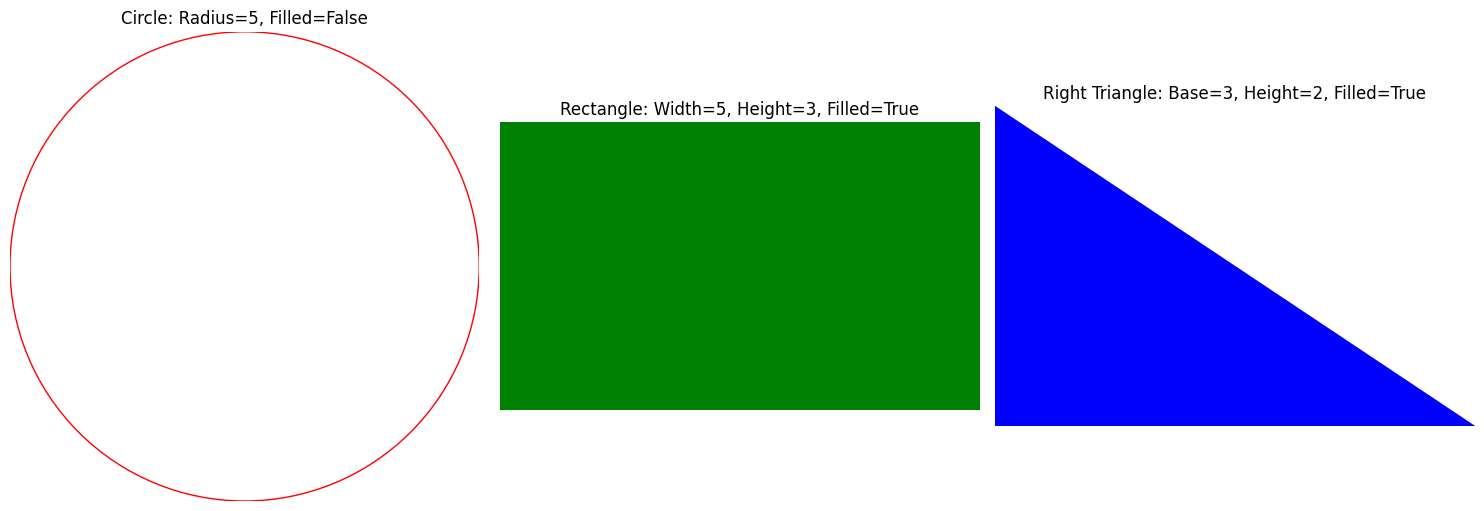

Circle Area: 78.54, Circle Perimeter: 31.42
Rectangle Area: 15.00, Rectangle Perimeter: 16.00
Right Triangle Area: 3.00, Right Triangle Perimeter: 8.61


In [12]:
# Create instances 
blank_red_circle = Circle("red", False, 5)
filled_green_rectangle = Rectangle("green", True, 3, 5)
filled_blue_right_triangle = RightTriangle("blue", True, 2, 3)

# Drawing shapes 
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
draw(blank_red_circle, axs[0])
draw(filled_green_rectangle, axs[1])
draw(filled_blue_right_triangle, axs[2])
plt.tight_layout()
plt.show()

# Printing area and perimeter of each shape
print(f"Circle Area: {blank_red_circle.area():.2f}, Circle Perimeter: {blank_red_circle.perimeter():.2f}")
print(f"Rectangle Area: {filled_green_rectangle.area():.2f}, Rectangle Perimeter: {filled_green_rectangle.perimeter():.2f}")
print(f"Right Triangle Area: {filled_blue_right_triangle.area():.2f}, Right Triangle Perimeter: {filled_blue_right_triangle.perimeter():.2f}")

### Q1.3 the super() method (in words)


Qestion: Why do we not need self in the super().__init__ function?

Answer: We do not need it for two reasons:


1. **Delegation of Method Calls**:
   - `super()` returns a proxy object that delegates method calls to the superclass, automatically determining the instance and class context.

2. **Automatic Passing of `self`**:
   - The `super()` proxy is bound to the instance, automatically passing `self` to superclass methods, making `super().__init__(x)` equivalent to `Parent.__init__(self, x)`.



In [13]:
# sample

class Parent:
    def __init__(self, x):
        print("this is", id(self))
        self.x = x

    def pmethod(self):
        print("from parent class")

class Child(Parent):

    def __init__(self, x, y):
    
        A = super() # Acts like Parent.__init__(self, x)
        B = super()
    
        B.pmethod()
        print(id(A), id(B))
        A.__init__(x)
        self.y = y
      
B = Child(1, 2)
B.pmethod()
id(B)


from parent class
4597634944 4596567424
this is 4598039568
from parent class


4598039568

## Question 2 Mimicing an iterator (code)

In [14]:
from collections.abc import Iterable

class MyIterator:
    # Q2.1 the constructor (code)
    def __init__(self, data):

        # Check if data is interable
        if not isinstance(data, Iterable):
            raise TypeError("wrong type")
        
        self.data = data
        self.index = 0

    # Q2.2 the __iter__ method (code)
    def __iter__(self):
        return self

    # Q2.3 the __next__ method (code)
    def __next__(self):
        if self.index < len(self.data):
            # Fetch the item at the current index
            result = self.data[self.index]
            # Increment the index to point to the next item
            self.index += 1
            return result
        else:
            # If all items have been returned, raise StopIteration
            raise StopIteration

## Question 3 The property decorator (code)

In [15]:
class Elephant:
    def __init__(self, height, weight, age):
        self._height = height  # Initialize with an underscore to distinguish from the property
        self._weight = weight  # Initialize with an underscore to distinguish from the property
        self._age = age

    @property
    def height(self):
        return self._height

    @height.setter
    def height(self, value):
        if value < self._height:
            raise ValueError("New height must be greater than or equal to the current height.")
        if value > 3:
            raise ValueError("Height cannot exceed 3 meters.")
        self._height = value  # Use the private attribute to avoid recursion

    @property
    def weight(self):
        return self._weight

    @weight.setter
    def weight(self, value):
        if value < self._weight:
            raise ValueError("New weight must be greater than or equal to the current weight.")
        if value > 7000:
            raise ValueError("Weight cannot exceed 7000 kg.")
        self._weight = value  # Use the private attribute to avoid recursion

    @property
    def age(self):
        return self._age

    def increment_age(self):
        self._age += 1  # Safely increment the age by one



In [16]:
elephant = Elephant(height=2, weight=5000, age=5)
print("Initial height:", elephant.height)
print("Initial weight:", elephant.weight)
print("Initial age:", elephant.age)
elephant.height = 2.5
elephant.weight = 6000
# elephant.age or elephant.increment_age()
print("Updated height:", elephant.height)
print("Updated weight:", elephant.weight)
print("Updated age:", elephant.age)

Initial height: 2
Initial weight: 5000
Initial age: 5
Updated height: 2.5
Updated weight: 6000
Updated age: 5
